# Twitter Sentiment Analysis - Technology and Innovation in UAE

In this notebook, we have develop a Sentiment Analysis model to categorize tweets related to 'Technology and Innovation in UAE' as positive, negative or neutral.

# Table of Contents

1. Part A - Data Collection
2. Part B - Data Labelling
3. Part C - Visualization and Insights 
4. Part D - Text Analytics Pipeline
5. Part E - Discussions and Conclusions

In [1]:
import sys
import tweepy
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from matplotlib import pyplot as plt
from sklearn.metrics import jaccard_score
%matplotlib inline
from plotly import graph_objs as go
from collections import Counter
import plotly.express as px
import plotly.figure_factory as ff
import itertools
import numpy as np
import re

In [2]:
# Importing the keys #
consumerKey = "azJq5KbpiMFauVwxUTGcEBUBW"
consumerSecret = "lcSu4UmOzoPRNcTt3xo3s502I738CTkpWz3cErqxbguC6prWXH"
accessToken = "563860386-BEt0tfcjAROUdLcpGXgURYNuF8D1CrXprYzbe4Ho"
accessTokenSecret = "9NcdCWt3IlcLO1ge7n33xKA9SGCq1oBLh3U4pFlOfSemj"

In [3]:
# Establish the connection with API #
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Part A - Data Collection

- Data has been collected using the following keywords in the the Twitter search function:

1. technology UAE (Digital OR Transformation OR Dubai OR Abu OR Dhabi OR AI OR AiEverything OR GITEX OR Sustainability OR Crypto OR Blockchain) lang:en

2. decarbonisation UAE (energy OR transformation OR cop28 OR cop27 OR emissions) (#COP27 OR #COP28)

3. Users: aspireuae, cebc2, enerwhere

- Data from hastags and serach bar is collected using a python code (without using Twitter API).
- Data is also collected from specific users who have link to UAE technology/innovation. This step is carried out by using the **Twitter API**.
- Total **7864 tweets** are collected for Sentiment Analysis.

In [4]:
df1 = pd.read_csv('tweets_df1.csv')
df1.drop('Unnamed: 0', axis =1, inplace=True)
df1.head()

Date             User  \
0  2023-01-31 18:50:10+00:00  GoodwayMachines   
1  2023-01-31 13:59:19+00:00        IBAevents   
2  2023-01-31 13:32:24+00:00     isladecrypto   
3  2023-01-31 13:24:43+00:00   XinaAIOfficial   
4  2023-01-31 12:57:19+00:00      Almaith_x_x   

                                               Tweet  
0  Goodway is growing! Thrilled to announce our n...  
1  Session information now available for 'IBA Mid...  
2  The island will be a destination for people wh...  
3  Xina will be showcasing our solutions at LEAP ...  
4  The #ArabHealth2023 Exhibition and Congress wa...

In [5]:
df2 = pd.read_csv('tweets_df2.csv')
df2.drop('Unnamed: 0', axis =1, inplace=True)
df2.head()

Date            User  \
0  2023-01-31 19:52:51+00:00   iShujaAhmedCh   
1  2023-01-31 19:34:17+00:00   GeorgeBoulos3   
2  2023-01-31 19:13:36+00:00  industryevents   
3  2023-01-31 18:13:58+00:00  Joshfishermann   
4  2023-01-31 17:12:29+00:00   admediaoffice   

                                               Tweet  
0  #UAE: Major solar plant to go operational befo...  
1  A thriller! Deserved win for Al-Riyadi. Defens...  
2  The Middle East Bunkering Convention takes pla...  
3  Once I take this shit remote I’m gonna post up...  
4  .@DoHSocial has linked Malaffi with the Riayat...

In [6]:
user = 'aspireuae'
# Set the limit of number of records
limit = 500

# Search using pagination
tweets = tweepy.Cursor(api.user_timeline, screen_name=user, tweet_mode='extended').items(limit)

# Create columns for the DataFrame
columns = ['Time', 'User', 'Tweet']
data = []

# Iterate through the results and append them to the list
for tweet in tweets:
    data.append([tweet.created_at, tweet.user.screen_name, tweet.full_text])

# Create a dataframe with the results
df_aspire = pd.DataFrame(data, columns=columns)

df_aspire.head()

Time       User  \
0 2023-02-08 13:37:48+00:00  aspireuae   
1 2023-01-23 06:50:40+00:00  aspireuae   
2 2022-12-31 14:19:18+00:00  aspireuae   
3 2022-12-02 07:22:38+00:00  aspireuae   
4 2022-11-30 16:10:20+00:00  aspireuae   

                                               Tweet  
0  RT @ADNECGroup: Highlights from the XPRIZE - F...  
1  Congratulations to the winners of this year’s ...  
2  Here's to a bright and exciting new year! #New...  
3  On the 51st UAE National Day, we celebrate the...  
4  Today, on #CommemorationDay, we honor and salu...

In [7]:
user = 'cebc2'
# Set the limit of number of records
limit = 500

# Search using pagination
tweets = tweepy.Cursor(api.user_timeline, screen_name=user, tweet_mode='extended').items(limit)

# Create columns for the DataFrame
columns = ['Time', 'User', 'Tweet']
data = []

# Iterate through the results and append them to the list
for tweet in tweets:
    data.append([tweet.created_at, tweet.user.screen_name, tweet.full_text])

# Create a dataframe with the results
df_cebc = pd.DataFrame(data, columns=columns)

df_cebc.head()

Time   User  \
0 2023-03-09 12:09:56+00:00  CEBC2   
1 2023-03-09 10:52:05+00:00  CEBC2   
2 2023-03-02 11:44:44+00:00  CEBC2   
3 2023-03-02 11:44:44+00:00  CEBC2   
4 2023-03-02 11:44:43+00:00  CEBC2   

                                               Tweet  
0                            https://t.co/tnbUJ0NjGz  
1  The CEBC is proud to work with so many incredi...  
2                         @eegemirates @Nasser_Saidi  
3  حيث قال: «إن السياسيين وصانعي السياسات الذين و...  
4  دعت مجموعة عمل الإمارات للبيئة عضوها الفخري ال...

In [8]:
user = 'enerwhere'
# Set the limit of number of records
limit = 500

# Search using pagination
tweets = tweepy.Cursor(api.user_timeline, screen_name=user, tweet_mode='extended').items(limit)

# Create columns for the DataFrame
columns = ['Time', 'User', 'Tweet']
data = []

# Iterate through the results and append them to the list
for tweet in tweets:
    data.append([tweet.created_at, tweet.user.screen_name, tweet.full_text])

# Create a dataframe with the results
df_enerwhere = pd.DataFrame(data, columns=columns)

df_enerwhere.head()

Time       User  \
0 2021-07-29 05:49:52+00:00  Enerwhere   
1 2021-07-28 10:16:04+00:00  Enerwhere   
2 2021-07-27 12:04:47+00:00  Enerwhere   
3 2021-07-26 08:41:26+00:00  Enerwhere   
4 2021-07-25 09:02:04+00:00  Enerwhere   

                                               Tweet  
0  Meet Habeeb. He has been at the heart of our O...  
1  Peaky loads require oversized DG setup. A prop...  
2  We've been chosen to power an educational faci...  
3  Sharjah’s largest mega project – Al Jada – is ...  
4  Enerwhere had built the solar-battery hybrid s...

In [9]:
df = pd.concat([df1, df2, df_aspire, df_enerwhere, df_cebc], axis=0)
df.head()

Date             User  \
0  2023-01-31 18:50:10+00:00  GoodwayMachines   
1  2023-01-31 13:59:19+00:00        IBAevents   
2  2023-01-31 13:32:24+00:00     isladecrypto   
3  2023-01-31 13:24:43+00:00   XinaAIOfficial   
4  2023-01-31 12:57:19+00:00      Almaith_x_x   

                                               Tweet Time  
0  Goodway is growing! Thrilled to announce our n...  NaT  
1  Session information now available for 'IBA Mid...  NaT  
2  The island will be a destination for people wh...  NaT  
3  Xina will be showcasing our solutions at LEAP ...  NaT  
4  The #ArabHealth2023 Exhibition and Congress wa...  NaT

In [10]:
df.drop(['Date','Time'],axis=1, inplace=True)
df = df.reset_index(drop=True)
df.head()

User                                              Tweet
0  GoodwayMachines  Goodway is growing! Thrilled to announce our n...
1        IBAevents  Session information now available for 'IBA Mid...
2     isladecrypto  The island will be a destination for people wh...
3   XinaAIOfficial  Xina will be showcasing our solutions at LEAP ...
4      Almaith_x_x  The #ArabHealth2023 Exhibition and Congress wa...

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7864 entries, 0 to 7863
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   User    7864 non-null   object
 1   Tweet   7864 non-null   object
dtypes: object(2)
memory usage: 123.0+ KB


In [12]:
df.describe()

User                                              Tweet
count    7864                                               7864
unique   3575                                               7689
top     CEBC2  The dam also has a storage capacity of 1,500 m...
freq      501                                                  7

# Part B: Data Labelling

- We have used Text Blob's library to calculate the polarity of the sentence / tweet of our dataset.
- Polarity lies between [-1,1] , -1 defines a negative sentiment, 0 neutral sentiment, and 1 defines a positive sentiment.

In [13]:
polarity_score=[]

for i in range(0, df.shape[0]):
    score = TextBlob(df.iloc[i][1])
    score1 = score.sentiment[0]
    polarity_score.append(score1)

In [14]:
df.head()

User                                              Tweet
0  GoodwayMachines  Goodway is growing! Thrilled to announce our n...
1        IBAevents  Session information now available for 'IBA Mid...
2     isladecrypto  The island will be a destination for people wh...
3   XinaAIOfficial  Xina will be showcasing our solutions at LEAP ...
4      Almaith_x_x  The #ArabHealth2023 Exhibition and Congress wa...

In [15]:
df = pd.concat([df, pd.Series(polarity_score)], axis = 1)

In [16]:
df.rename(columns={df.columns[2]: "Polarity"} , inplace = True)
df.head()

User                                              Tweet  \
0  GoodwayMachines  Goodway is growing! Thrilled to announce our n...   
1        IBAevents  Session information now available for 'IBA Mid...   
2     isladecrypto  The island will be a destination for people wh...   
3   XinaAIOfficial  Xina will be showcasing our solutions at LEAP ...   
4      Almaith_x_x  The #ArabHealth2023 Exhibition and Congress wa...   

   Polarity  
0  0.309091  
1  0.133333  
2  0.141071  
3  0.000000  
4  0.000000

In [17]:
df.iloc[0][2]

0.3090909090909091

In [18]:
Tweet_Sentiment = []

for i in range(0, df.shape[0]):

    if (df.iloc[i][2] == 0):
        Tweet_Sentiment.append("Neutral")
    
    elif (df.iloc[i][2] < 0.00):
        Tweet_Sentiment.append("Negative")
    
    elif (df.iloc[i][2] > 0.00):
        Tweet_Sentiment.append("Positive")

In [19]:
df = pd.concat([df, pd.Series(Tweet_Sentiment)], axis = 1)

In [20]:
df.rename(columns={df.columns[3]: "Tweet_Sentiment"} , inplace = True)
df.head()

User                                              Tweet  \
0  GoodwayMachines  Goodway is growing! Thrilled to announce our n...   
1        IBAevents  Session information now available for 'IBA Mid...   
2     isladecrypto  The island will be a destination for people wh...   
3   XinaAIOfficial  Xina will be showcasing our solutions at LEAP ...   
4      Almaith_x_x  The #ArabHealth2023 Exhibition and Congress wa...   

   Polarity Tweet_Sentiment  
0  0.309091        Positive  
1  0.133333        Positive  
2  0.141071        Positive  
3  0.000000         Neutral  
4  0.000000         Neutral

In [21]:
Label = []

for i in range(0, df.shape[0]):

    if (df.iloc[i][3] == "Negative"):
        Label.append("-1")
    
    elif (df.iloc[i][3] == "Neutral"):
        Label.append("0")
    
    elif (df.iloc[i][3] == "Positive"):
        Label.append("1")

In [22]:
df = pd.concat([df, pd.Series(Label)], axis = 1)
df.rename(columns={df.columns[4]: "Label"} , inplace = True)
df.head()

User                                              Tweet  \
0  GoodwayMachines  Goodway is growing! Thrilled to announce our n...   
1        IBAevents  Session information now available for 'IBA Mid...   
2     isladecrypto  The island will be a destination for people wh...   
3   XinaAIOfficial  Xina will be showcasing our solutions at LEAP ...   
4      Almaith_x_x  The #ArabHealth2023 Exhibition and Congress wa...   

   Polarity Tweet_Sentiment Label  
0  0.309091        Positive     1  
1  0.133333        Positive     1  
2  0.141071        Positive     1  
3  0.000000         Neutral     0  
4  0.000000         Neutral     0

In [23]:
df['Tweet'][1]

"Session information now available for 'IBA Middle East Conference: Law Firms &amp; Clients working together' #IBAMEC\n\n🔹 Session 6 - 15:45-16:30 - The place of technology now &amp; in the future...\n\n📆 6-7 March 2023 🌍 Dubai, UAE\n\nRegister Your Interest➡ https://t.co/OyBP7NIq4i\n\n#Law https://t.co/xGsFYIkfYv"

In [24]:
temp = df.groupby('Tweet_Sentiment').count()['Tweet'].reset_index().sort_values(by='Tweet',ascending=False)
temp.style.background_gradient(cmap='Purples')

In [25]:
from plotly import graph_objs as go
fig = go.Figure(go.Funnelarea(
    text =temp.Tweet_Sentiment,
    values = temp.Tweet,
    title = {"position": "top center", "text": "Funnel-Chart of UAE Technology Tweets Sentiment Distribution"}
    ))
fig.show()

# TARGET RESAMPLING

- We have a heavily skewed distribution, with majority of positive (62%) sentiment tweets in comparison to only 7% negative sentiment tweets - hence resampling the target class is imperative.
- We have used an undersampling technique to reduce the majority instances in the majority and minority levels.
- We are randomly selecting observations and deleting the fields to get the desired ratio. We are keeping 1000 positive, 1000 neutral and all 620 negative tweets. 

In [26]:
positive_tweets = df.copy()
positive_tweets = positive_tweets[positive_tweets['Label'] == '1']
positive_tweets = positive_tweets.reset_index()
positive_tweets.drop(columns='index',axis=1, inplace=True)
positive_tweets.shape

(4876, 5)

In [27]:
negative_tweets = df.copy()
negative_tweets = negative_tweets[negative_tweets['Label'] == '-1']
negative_tweets = negative_tweets.reset_index()
negative_tweets.drop(columns='index',axis=1, inplace=True)
negative_tweets.shape

(620, 5)

In [28]:
neutral_tweets = df.copy()
neutral_tweets = neutral_tweets[neutral_tweets['Label'] == '0']
neutral_tweets = neutral_tweets.reset_index()
neutral_tweets.drop(columns='index',axis=1, inplace=True)
neutral_tweets.shape

(2368, 5)

In [29]:
import random
delete = random.sample(range(1,4876),3876)
positive_tweets = positive_tweets.drop(positive_tweets.index[delete])
positive_tweets.shape

(1000, 5)

In [30]:
import random
delete = random.sample(range(1,2367),1367)
neutral_tweets = neutral_tweets.drop(neutral_tweets.index[delete])
neutral_tweets.shape

(1001, 5)

In [31]:
negative_tweets = df.copy()
negative_tweets = negative_tweets[negative_tweets['Label'] == '-1']
negative_tweets = negative_tweets.reset_index()
negative_tweets.shape

(620, 6)

In [32]:
df = pd.concat([positive_tweets, neutral_tweets, negative_tweets], axis = 0)
df.head()

User                                              Tweet  \
0   GoodwayMachines  Goodway is growing! Thrilled to announce our n...   
13         TrionixM  Stay updated with the latest technology and fe...   
15    digitrendsinc  Witness the live demonstrations of our Digital...   
23         mohapuae  Highlights from our first day participation at...   
38   ibmag_magazine  Al-Futtaim Group partners with SAP to bolster ...   

    Polarity Tweet_Sentiment Label  index  
0   0.309091        Positive     1    NaN  
13  0.625000        Positive     1    NaN  
15  0.212121        Positive     1    NaN  
23  0.250000        Positive     1    NaN  
38  0.400000        Positive     1    NaN

In [33]:
temp = df.groupby('Tweet_Sentiment').count()['Tweet'].reset_index().sort_values(by='Tweet',ascending=False)
temp.style.background_gradient(cmap='Purples')

In [34]:
import plotly.express as px
fig = px.pie(df, names='Tweet_Sentiment', title ='Pie chart of tweet sentiments after resampling', color='Tweet_Sentiment',
             color_discrete_map={'Neutral':'darkblue',
                                 'Positive':'cyan',
                                 'Negative':'lightcyan'})
fig.show()

In [35]:
df.drop(columns='index', inplace=True)
df = df.reset_index()

# Part C - Visualization and Insights

- The average number of words in a tweet is approximately is 40 (as per 'Kernel Distribution of Number Of words')
- UAE, Dubai and Technology are the words commonly appearing for all three sentiments.
- Word Cloud gives valuable information about the other keywords like - innovation, business, future and digital.
- Links and red heart emojis have been widely used in tweets for positive sentiments.
- Clapping hand emojis for negative tweets sentiments might indicate sarcasm.
- 'AI' word represents a negative emtotion in tweets.

# Exploratory Data Analysis (EDA)

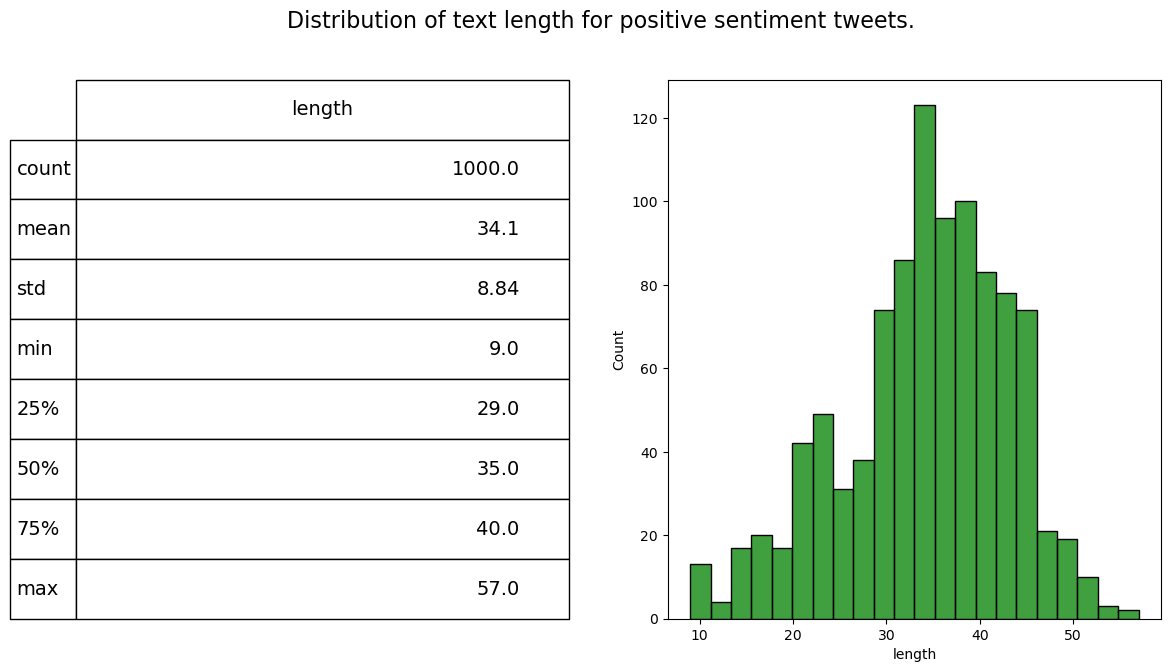

In [36]:
#Distribution of text length for positive sentiment tweets

fig = plt.figure(figsize=(14,7))
df['length'] = df.Tweet.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['Tweet_Sentiment']=='Positive']['length'], ax=ax1,color='green')
describe = df.length[df.Tweet_Sentiment=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

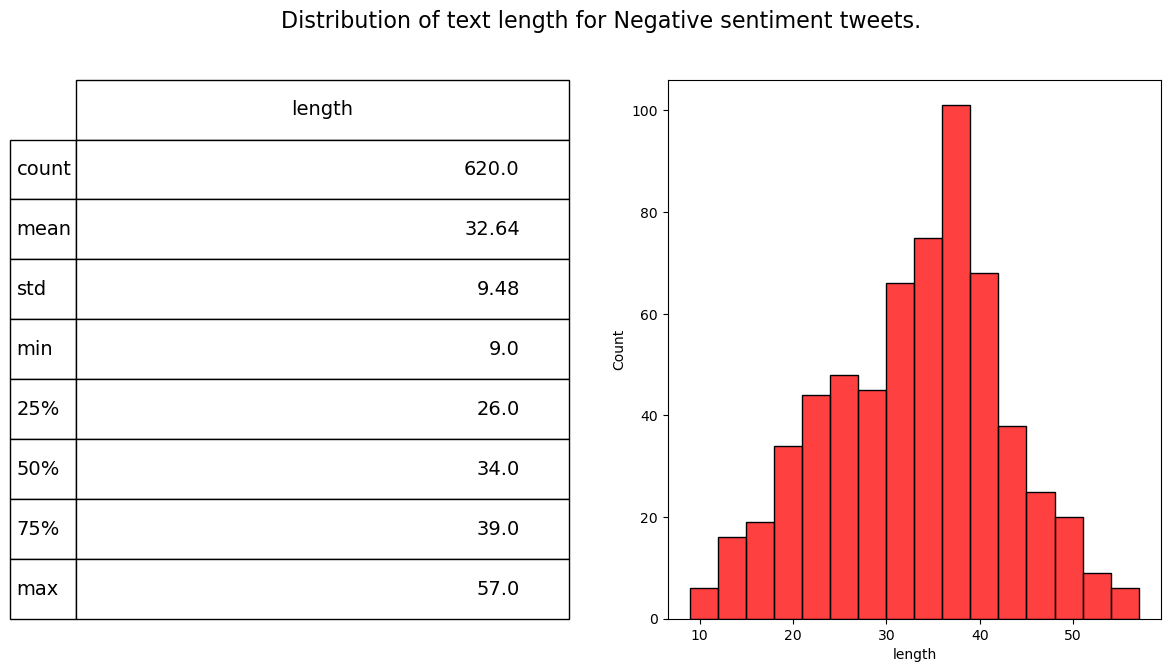

In [37]:
# Distribution of text length for Negative sentiment tweets

fig = plt.figure(figsize=(14,7))
df['length'] = df.Tweet.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['Tweet_Sentiment']=='Negative']['length'], ax=ax1,color='red')
describe = df.length[df.Tweet_Sentiment=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment tweets.', fontsize=16)

plt.show()

In [38]:
df['Num_word_text'] = df['Tweet'].apply(lambda x:len(str(x).split())) #Number Of words in main text

/var/folders/pk/w02nyv7x67d_gpdyrsrfp5y40000gn/T/ipykernel_22180/783802600.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




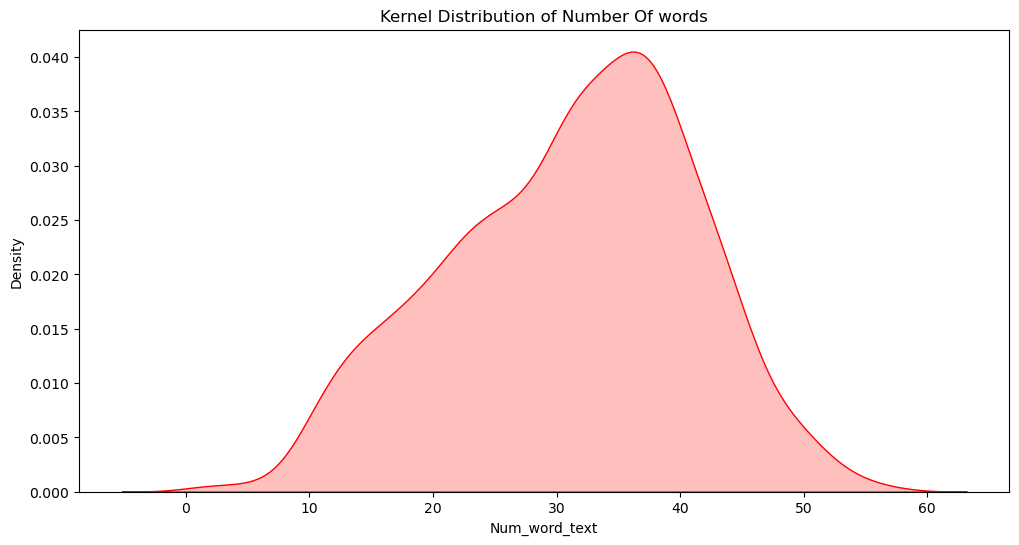

In [39]:
# Distribution of Number of Words in a Tweet

plt.figure(figsize=(12,6))
p1=sns.kdeplot(df['Num_word_text'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')

In [40]:
import re
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

word_counts = {'Positive': [],
                'Neutral': [],
                'Negative': []}

pattern = re.compile('[^\w ]')
for text, t in zip(df['Tweet'], df['Tweet_Sentiment']):
    text = re.sub(pattern, '', text).lower().split()
    text = [word for word in text if word not in stopwords_list]
    word_counts[t].extend(text)
               

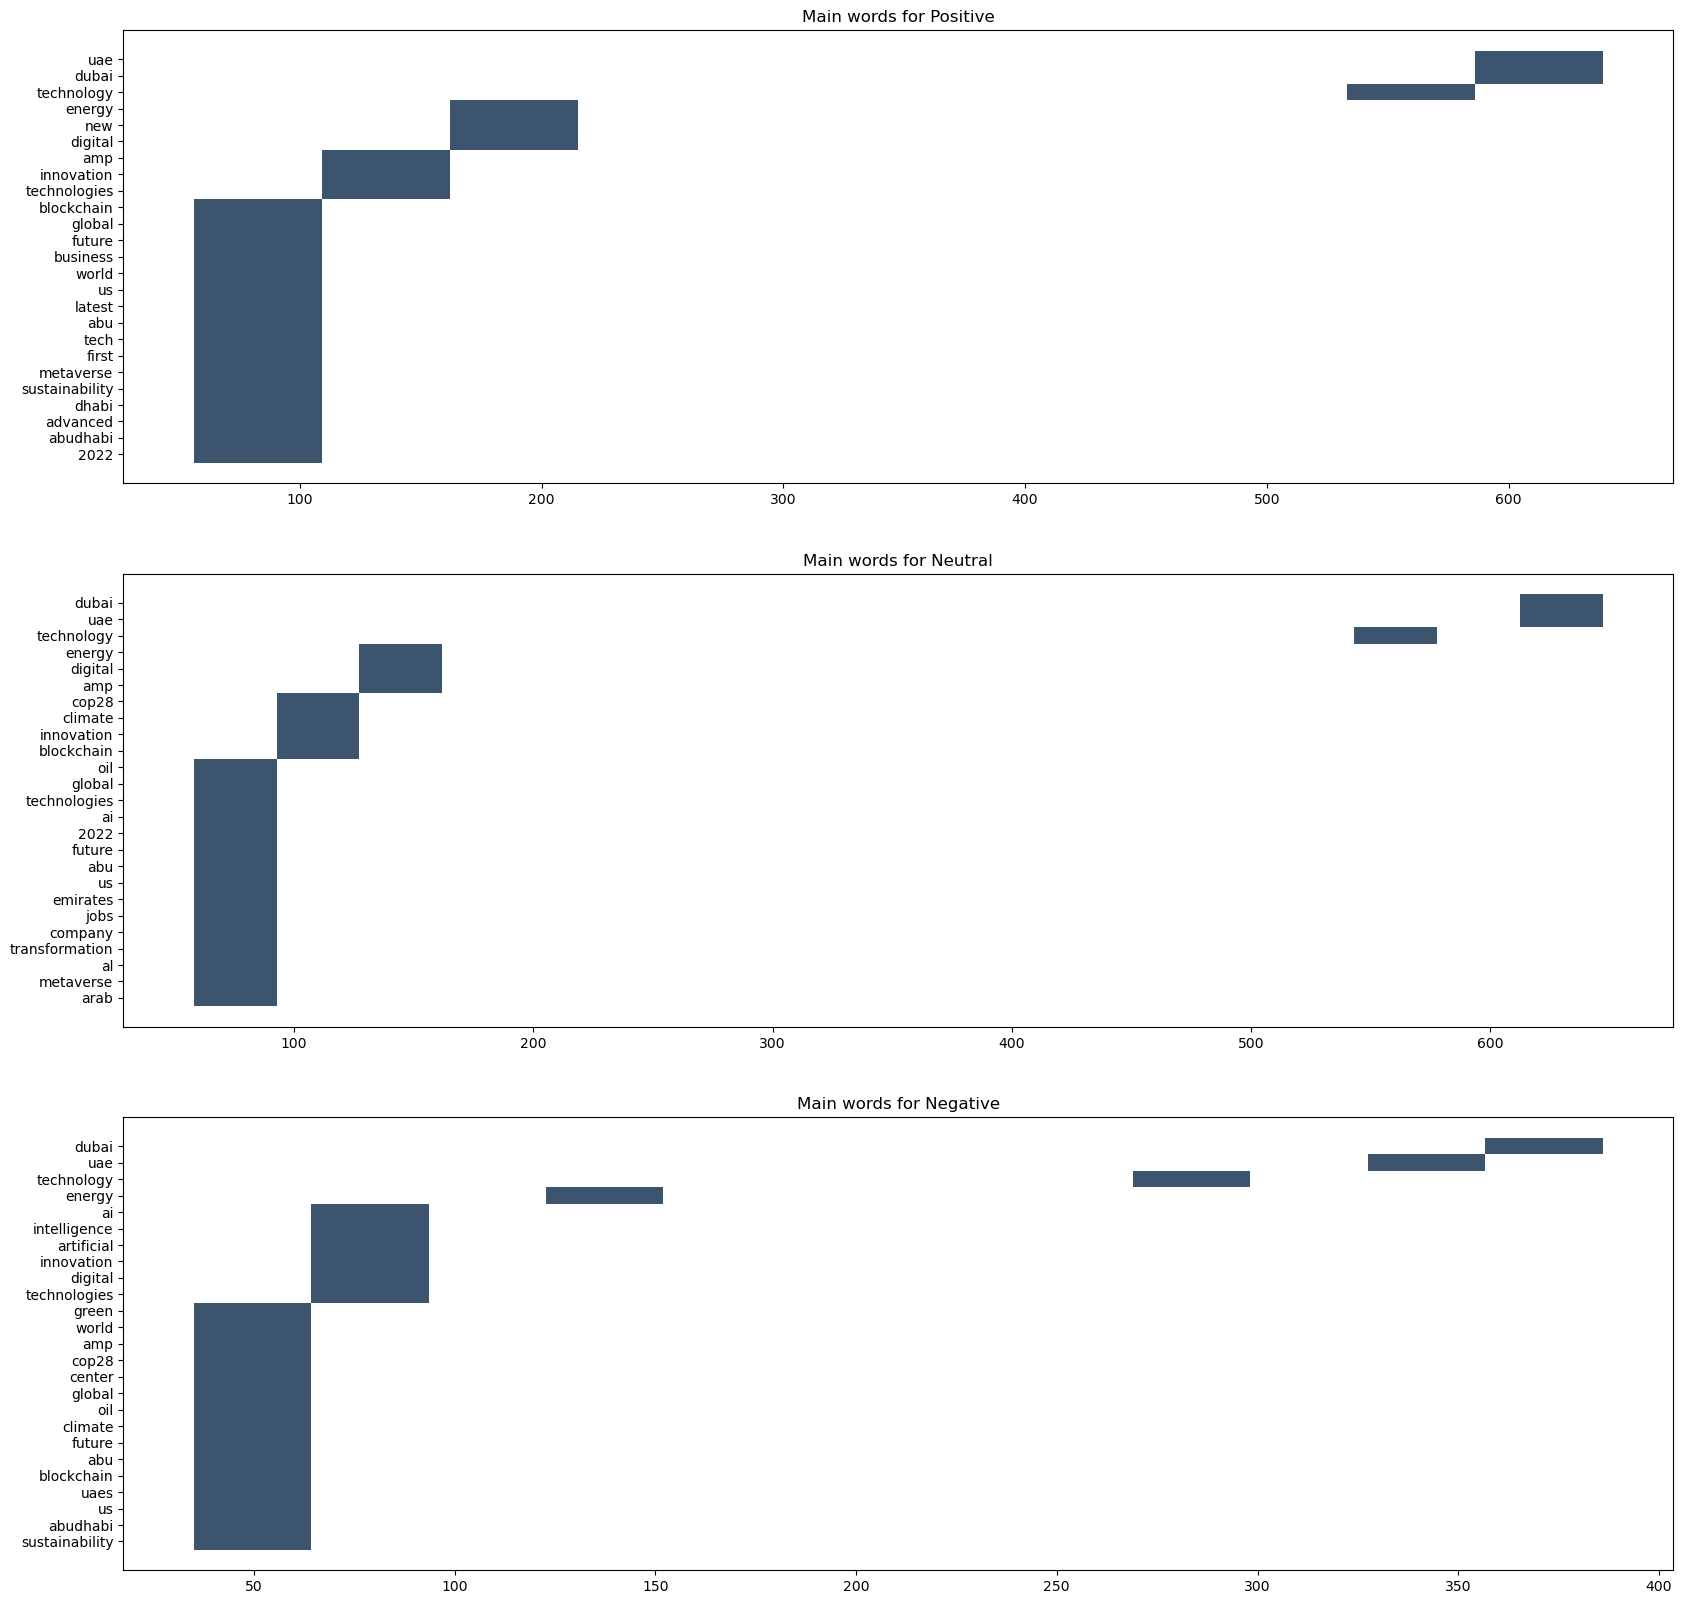

In [41]:
fig, axes = plt.subplots(3, 1, figsize=(20,20))
for axis, (target, words) in zip(axes.flatten(), word_counts.items()):
    bar_info = pd.Series(words).value_counts()[:25]
    sns.histplot(x=bar_info.values, y=bar_info.index, ax=axis)
    axis.set_title(f'Main words for {target}')
plt.show()

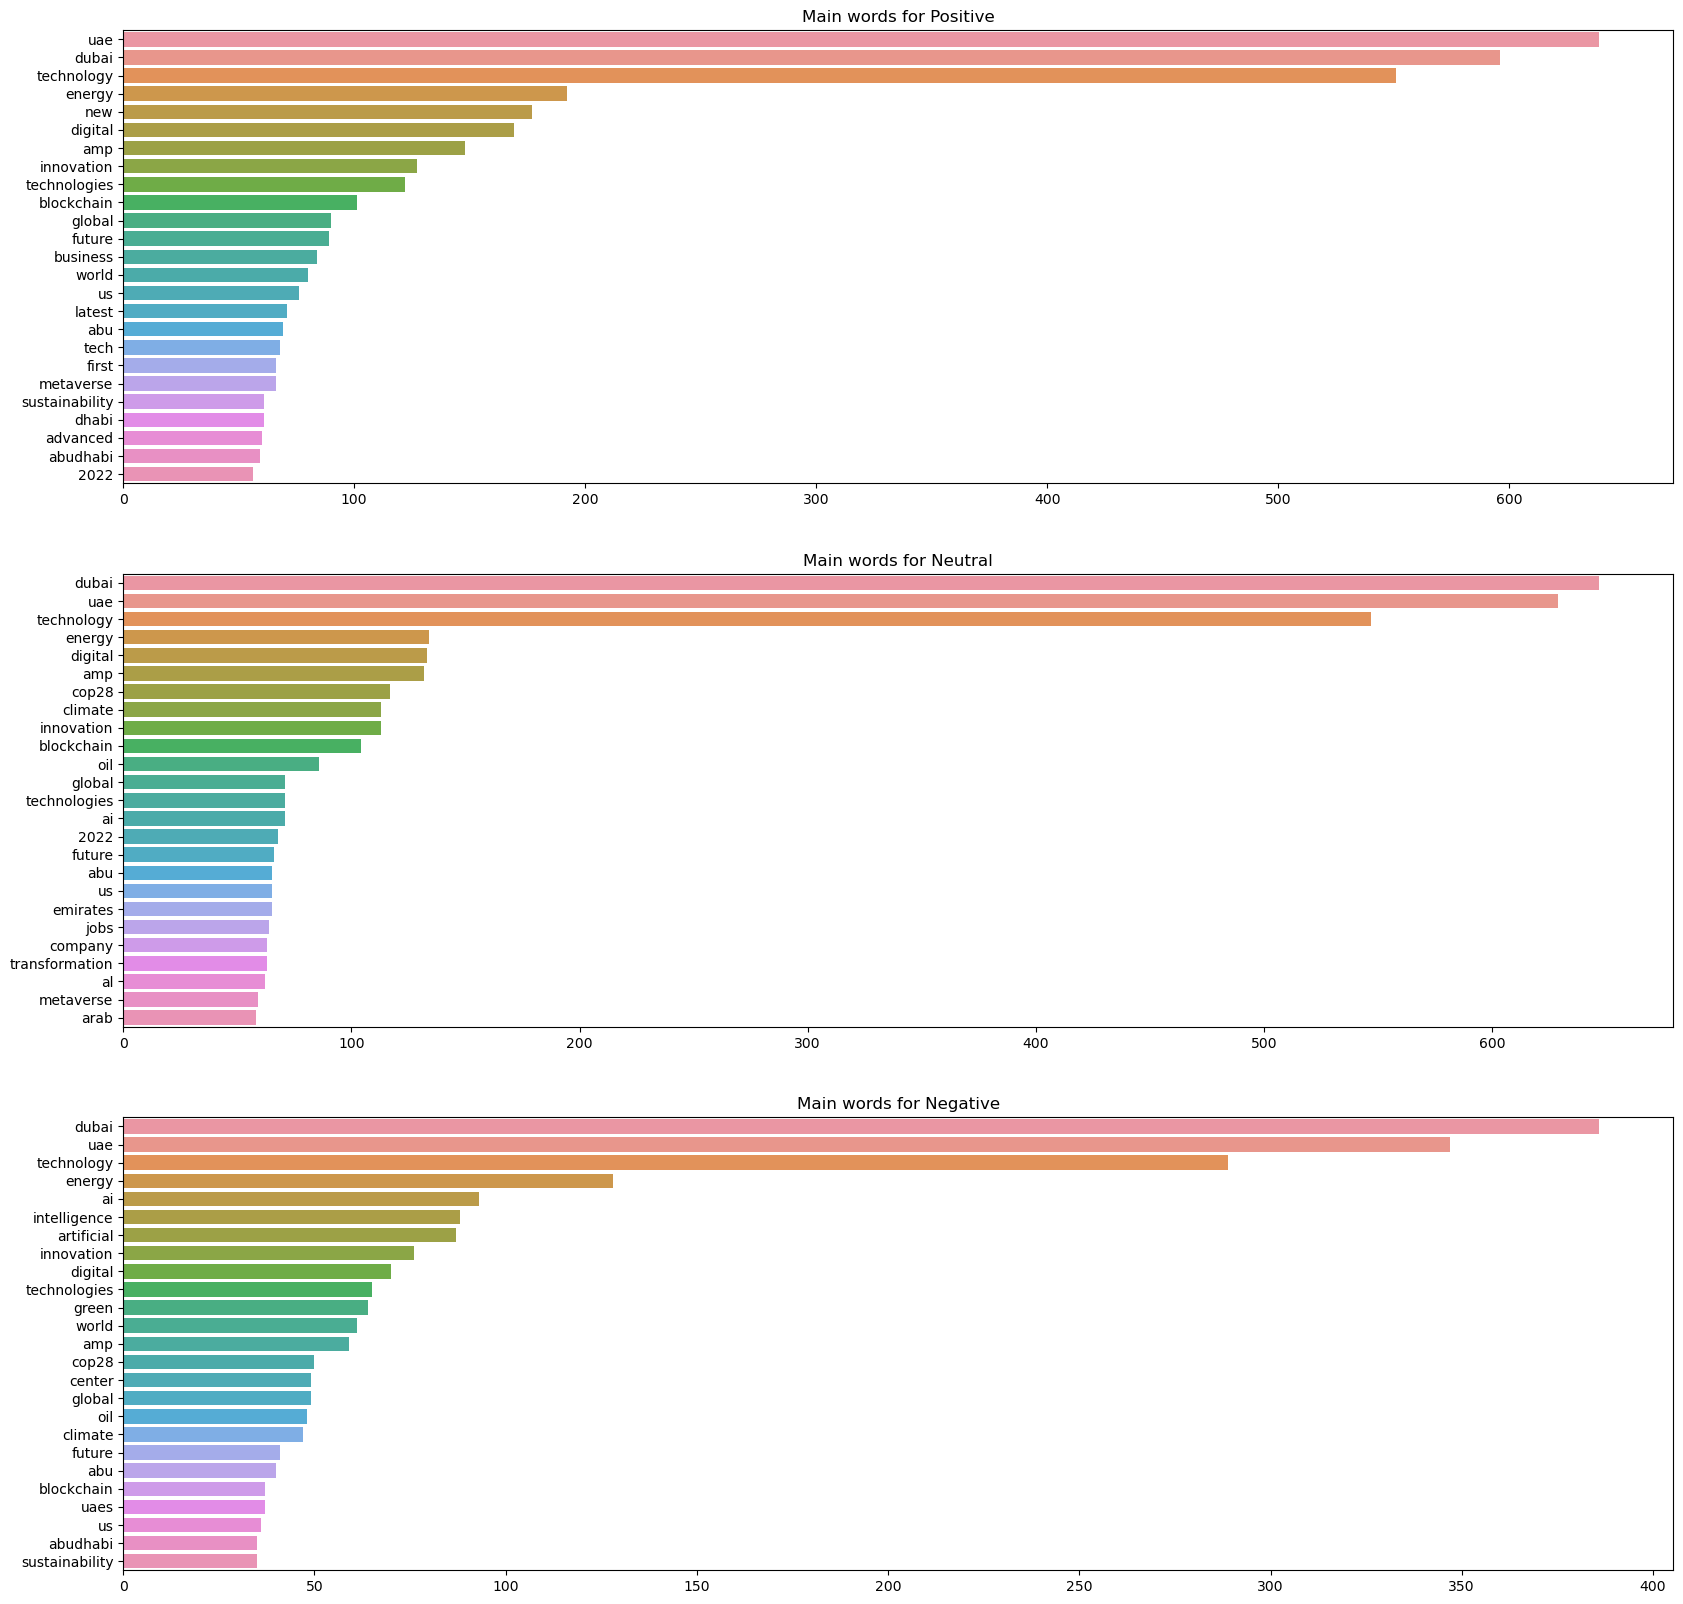

In [42]:
fig, axes = plt.subplots(3, figsize=(20,20))
for axis, (target, words) in zip(axes.flatten(), word_counts.items()):
    bar_info = pd.Series(words).value_counts()[:25]
    sns.barplot(x=bar_info.values, y=bar_info.index, ax=axis)
    axis.set_title(f'Main words for {target}')
plt.show()

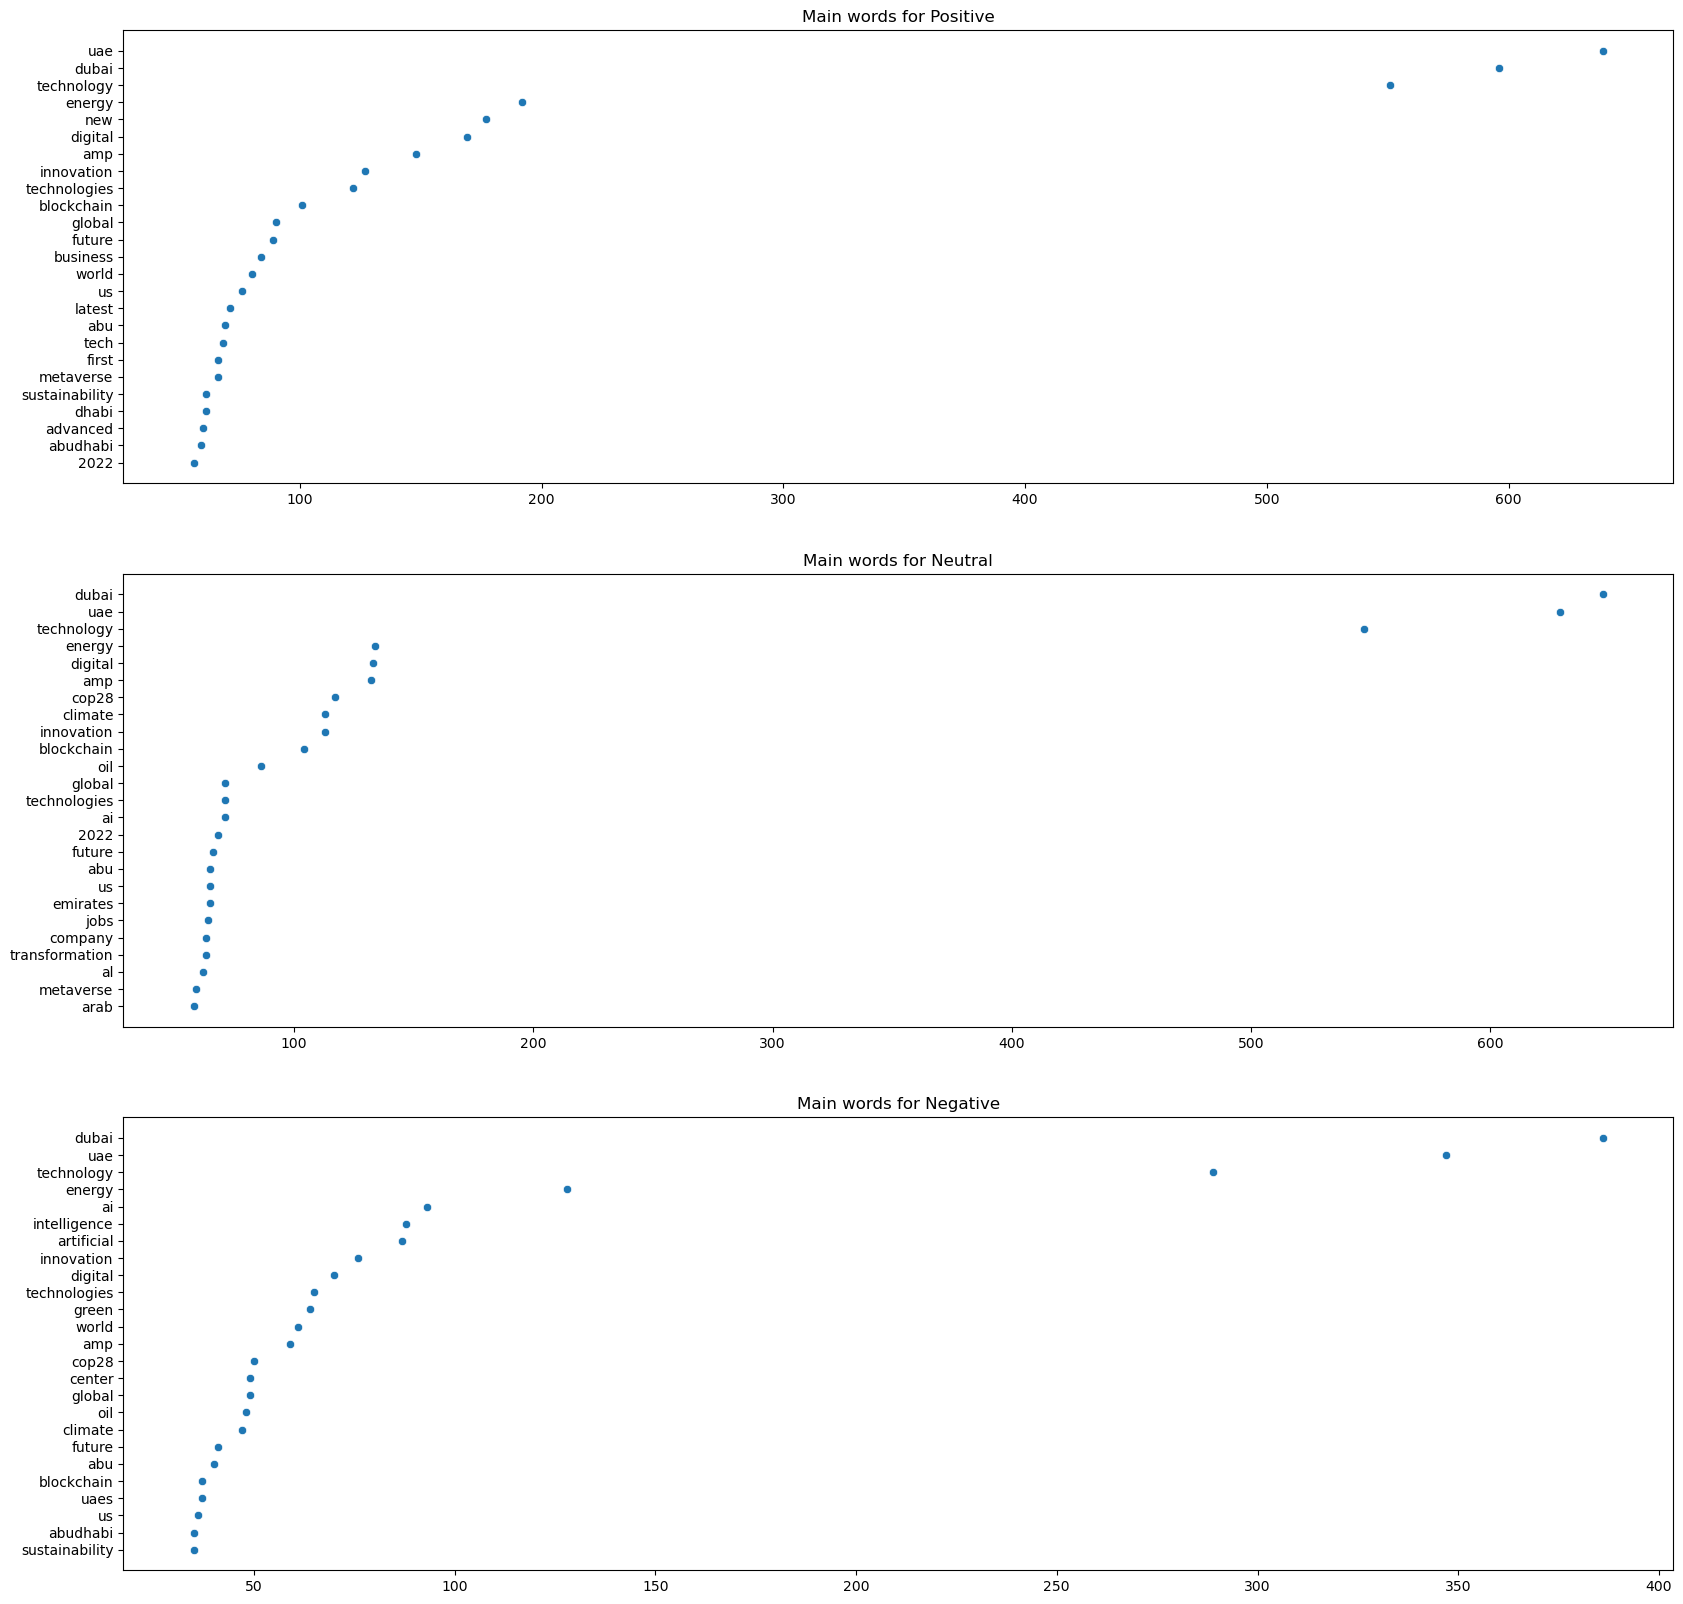

In [43]:
fig, axes = plt.subplots(3,1, figsize=(20,20))
for axis, (target, words) in zip(axes.flatten(), word_counts.items()):
    bar_info = pd.Series(words).value_counts()[:25]
    sns.scatterplot(x=bar_info.values, y=bar_info.index, ax=axis)
    axis.set_title(f'Main words for {target}')
plt.show()

In [44]:
import emoji
import regex as re

def split_count(text):
    emoji_list = []
    data = re.findall(r'\X', text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)
    
    return emoji_list

In [45]:
target_emojis = {'Positive': [],
                'Neutral': [],
                'Negative': []}

pattern = re.compile('\u200d')
for i, text in enumerate(df['Tweet']):
    emoji_count = split_count(text)
    if emoji_count:
        emoji_count = [re.sub(pattern, '', e) for e in emoji_count]
        target_emojis[df["Tweet_Sentiment"].iloc[i]].extend(emoji_count)

Top emojis for Positive 
 ['✔', '➡', '❤️', '👉', '➡️', '♥️', '✅', '🚀', '⭐️', '👇', '📍', '🔗', '👀', '😂', '😍', '⚡', '®', '🤝', '📞', '✨']


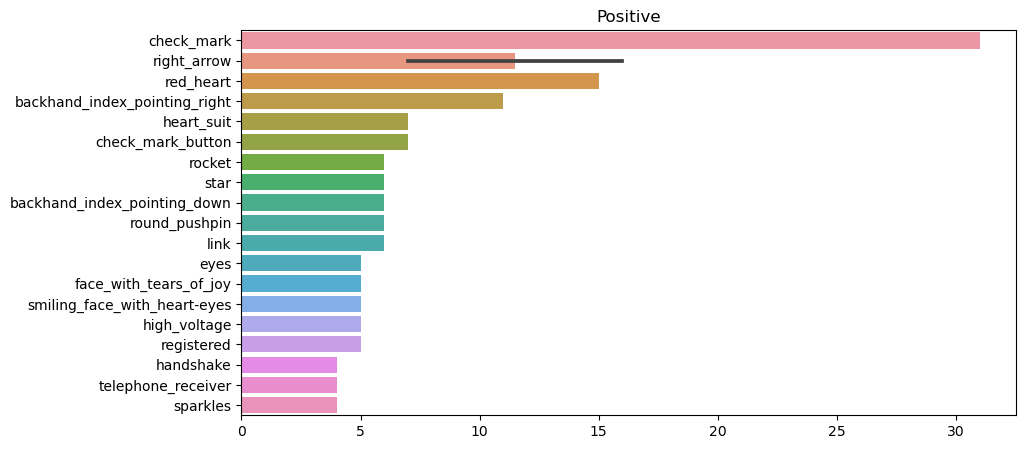

Top emojis for Neutral 
 ['📍', '👏', '👉', '\U0001fae0', '👇', '🔗', '⚡️', '🚀', '🔥', '➡️', '🌐', '✨', '🙌🏻', '📅', '😂', '®', '😳', '😫', '✅', '🗓']


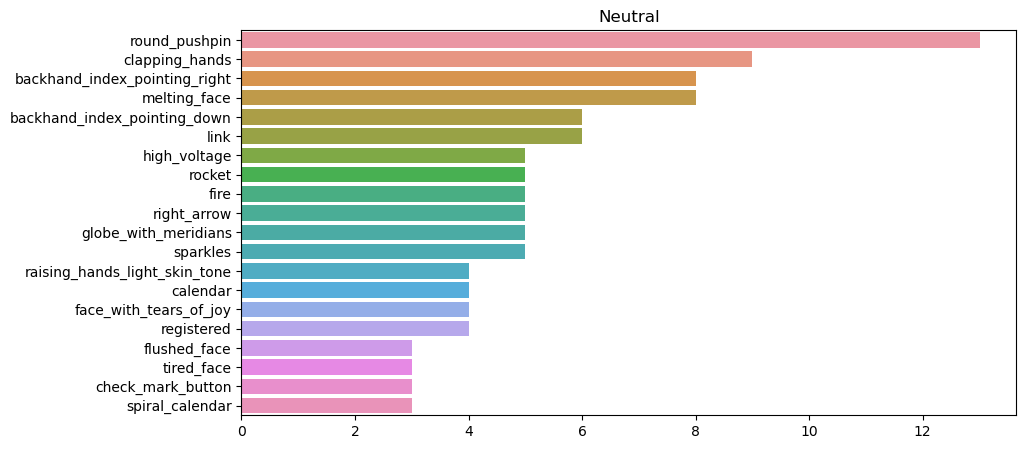

Top emojis for Negative 
 ['♻️', '✅', '👏', '✔', '😂', '📈', '🔔', '🤣', '🚨', '👀', '🧵', '📍', '⚡', '🔥', '📲', '✨', '🌎', '‼️', '⁉️', '🤝']


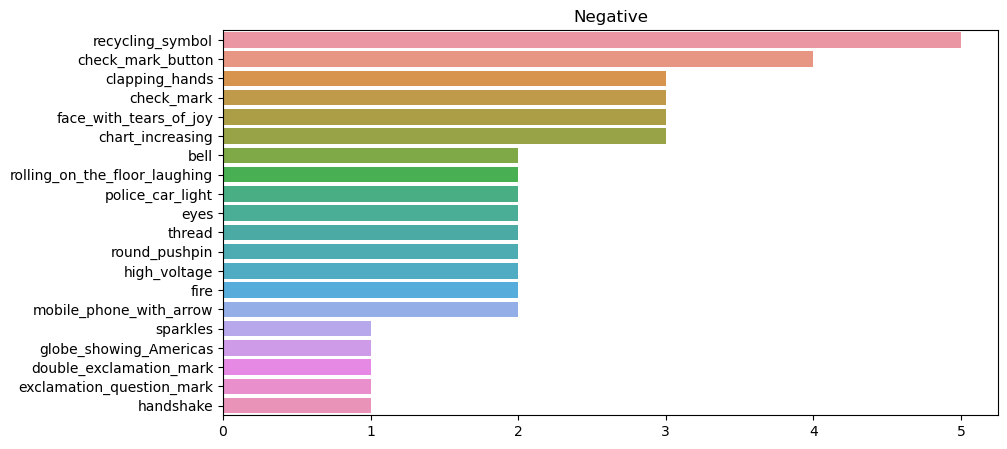

In [46]:
for t, emojis in target_emojis.items():
    plt.figure(figsize=(10, 5))
    bar_info = pd.Series(emojis).value_counts()[:20]
    print('=========='*10,  f'\nTop emojis for {t} \n', list(bar_info.index))
    bar_info.index = [emoji.demojize(i, delimiters=("", "")) for i in bar_info.index]
    sns.barplot(x=bar_info.values, y=bar_info.index)
        
    plt.title(f'{t}')
    plt.show()

Top emojis for Positive 
 ['✔', '➡', '❤️', '👉', '➡️', '♥️', '✅', '🚀', '⭐️', '👇', '📍', '🔗', '👀', '😂', '😍', '⚡', '®', '🤝', '📞', '✨']


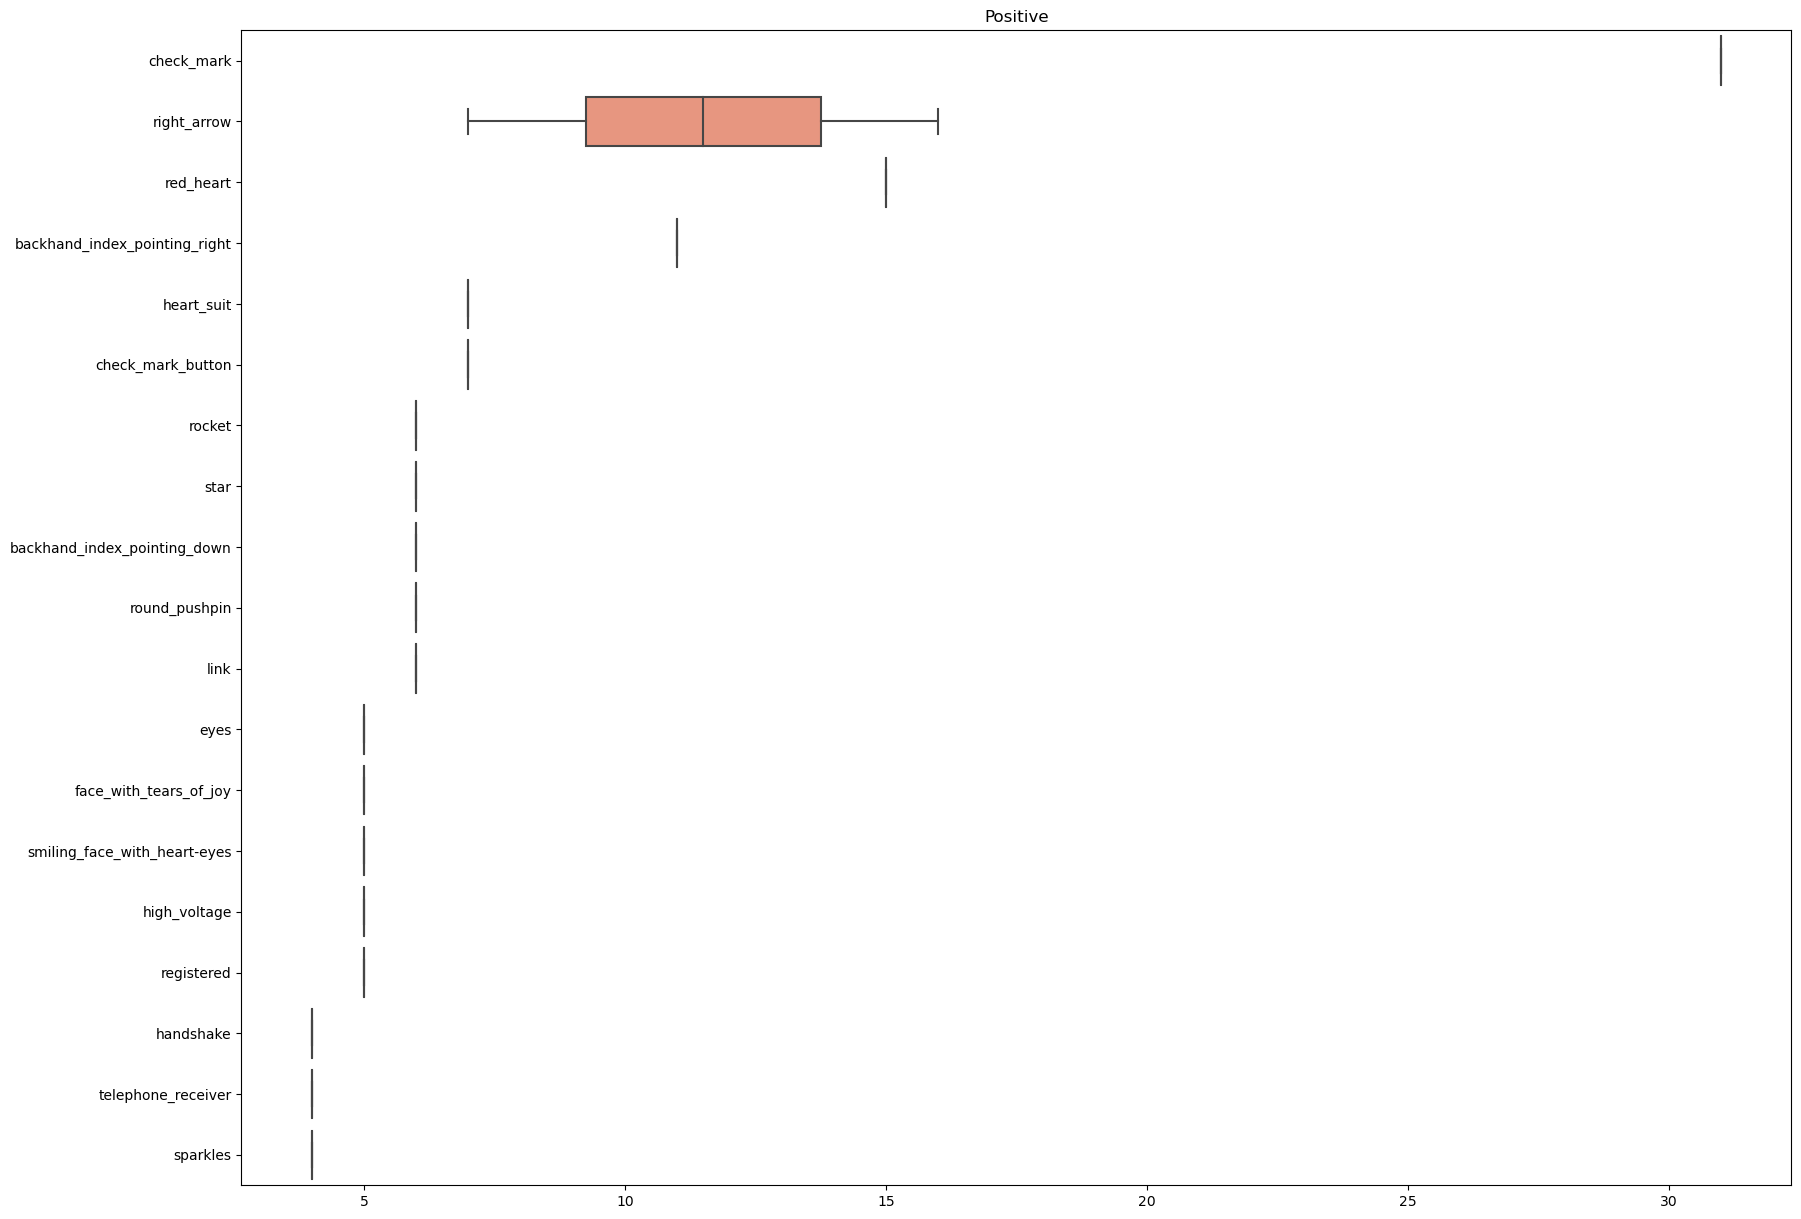

Top emojis for Neutral 
 ['📍', '👏', '👉', '\U0001fae0', '👇', '🔗', '⚡️', '🚀', '🔥', '➡️', '🌐', '✨', '🙌🏻', '📅', '😂', '®', '😳', '😫', '✅', '🗓']


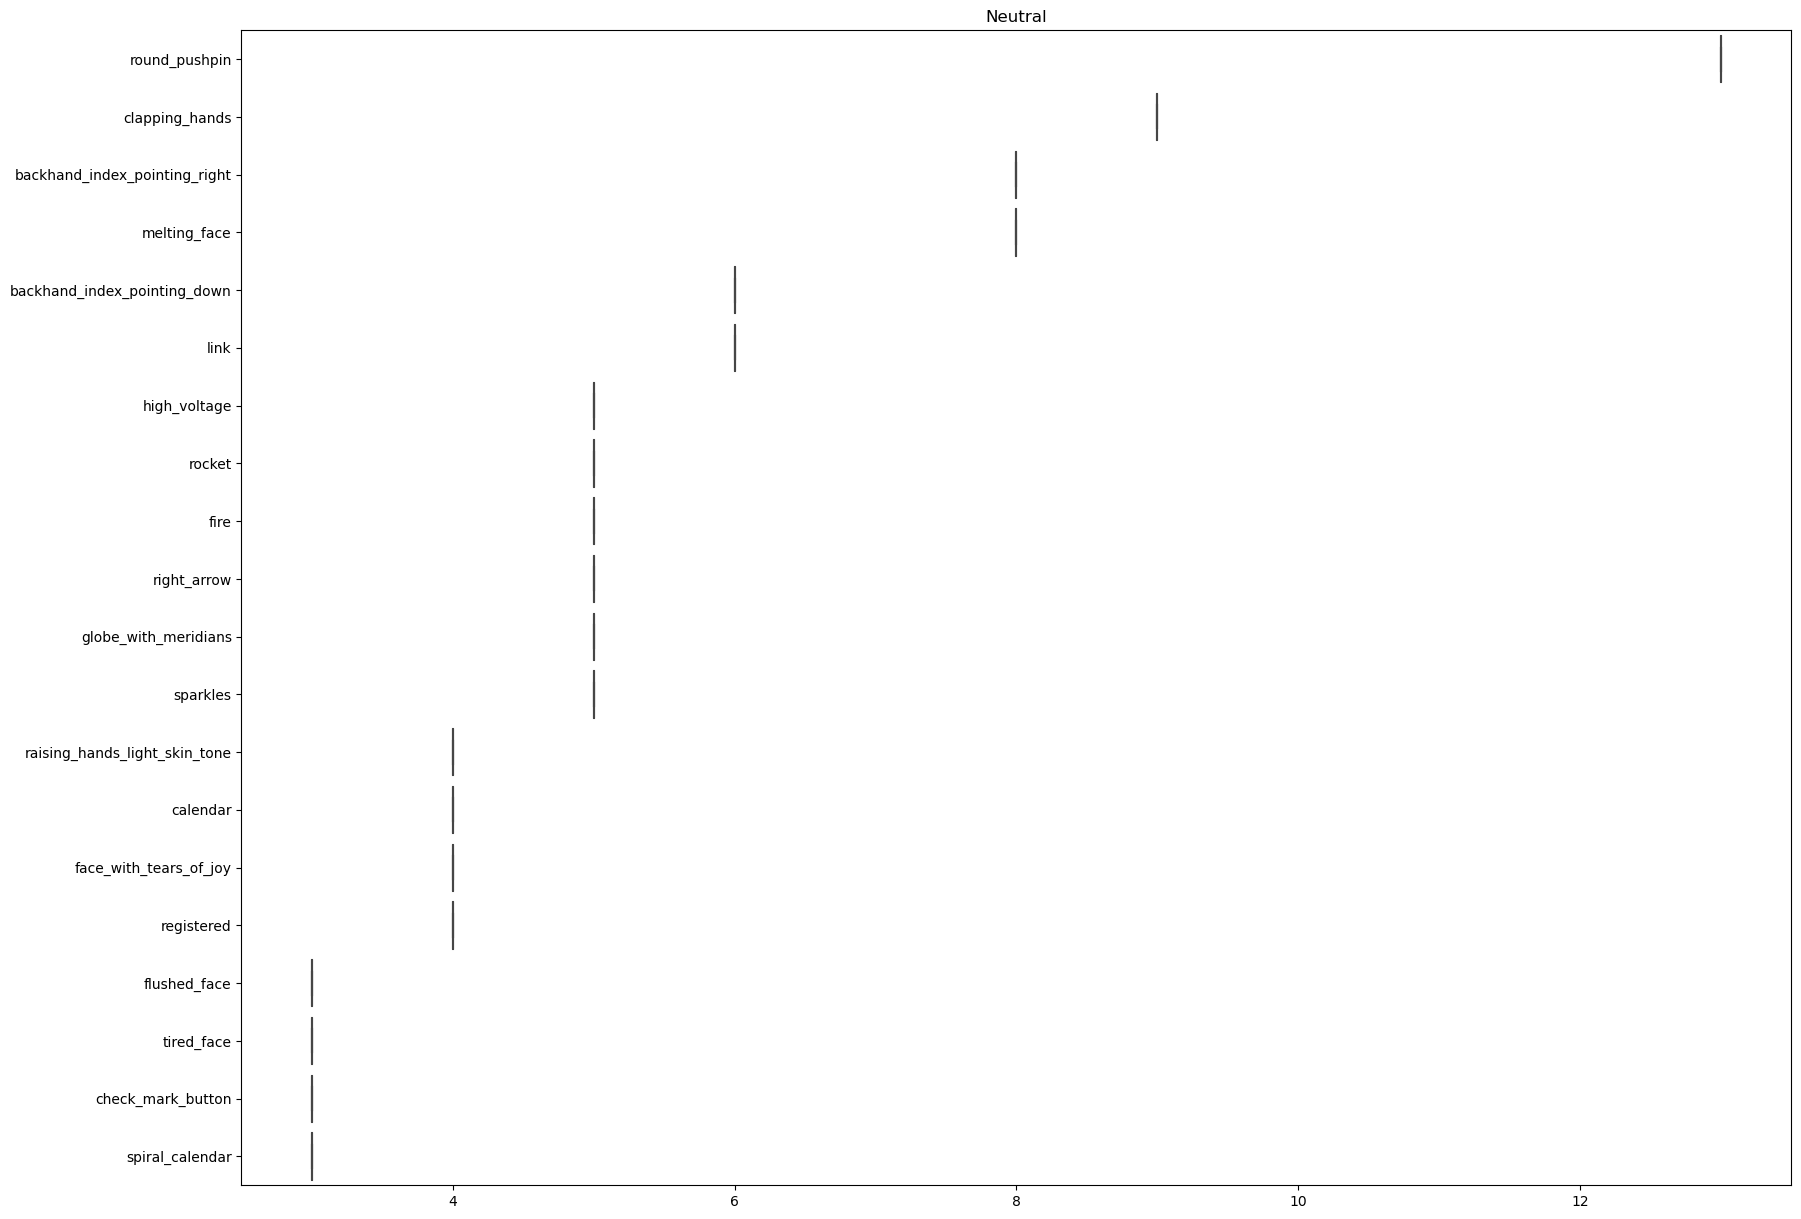

Top emojis for Negative 
 ['♻️', '✅', '👏', '✔', '😂', '📈', '🔔', '🤣', '🚨', '👀', '🧵', '📍', '⚡', '🔥', '📲', '✨', '🌎', '‼️', '⁉️', '🤝']


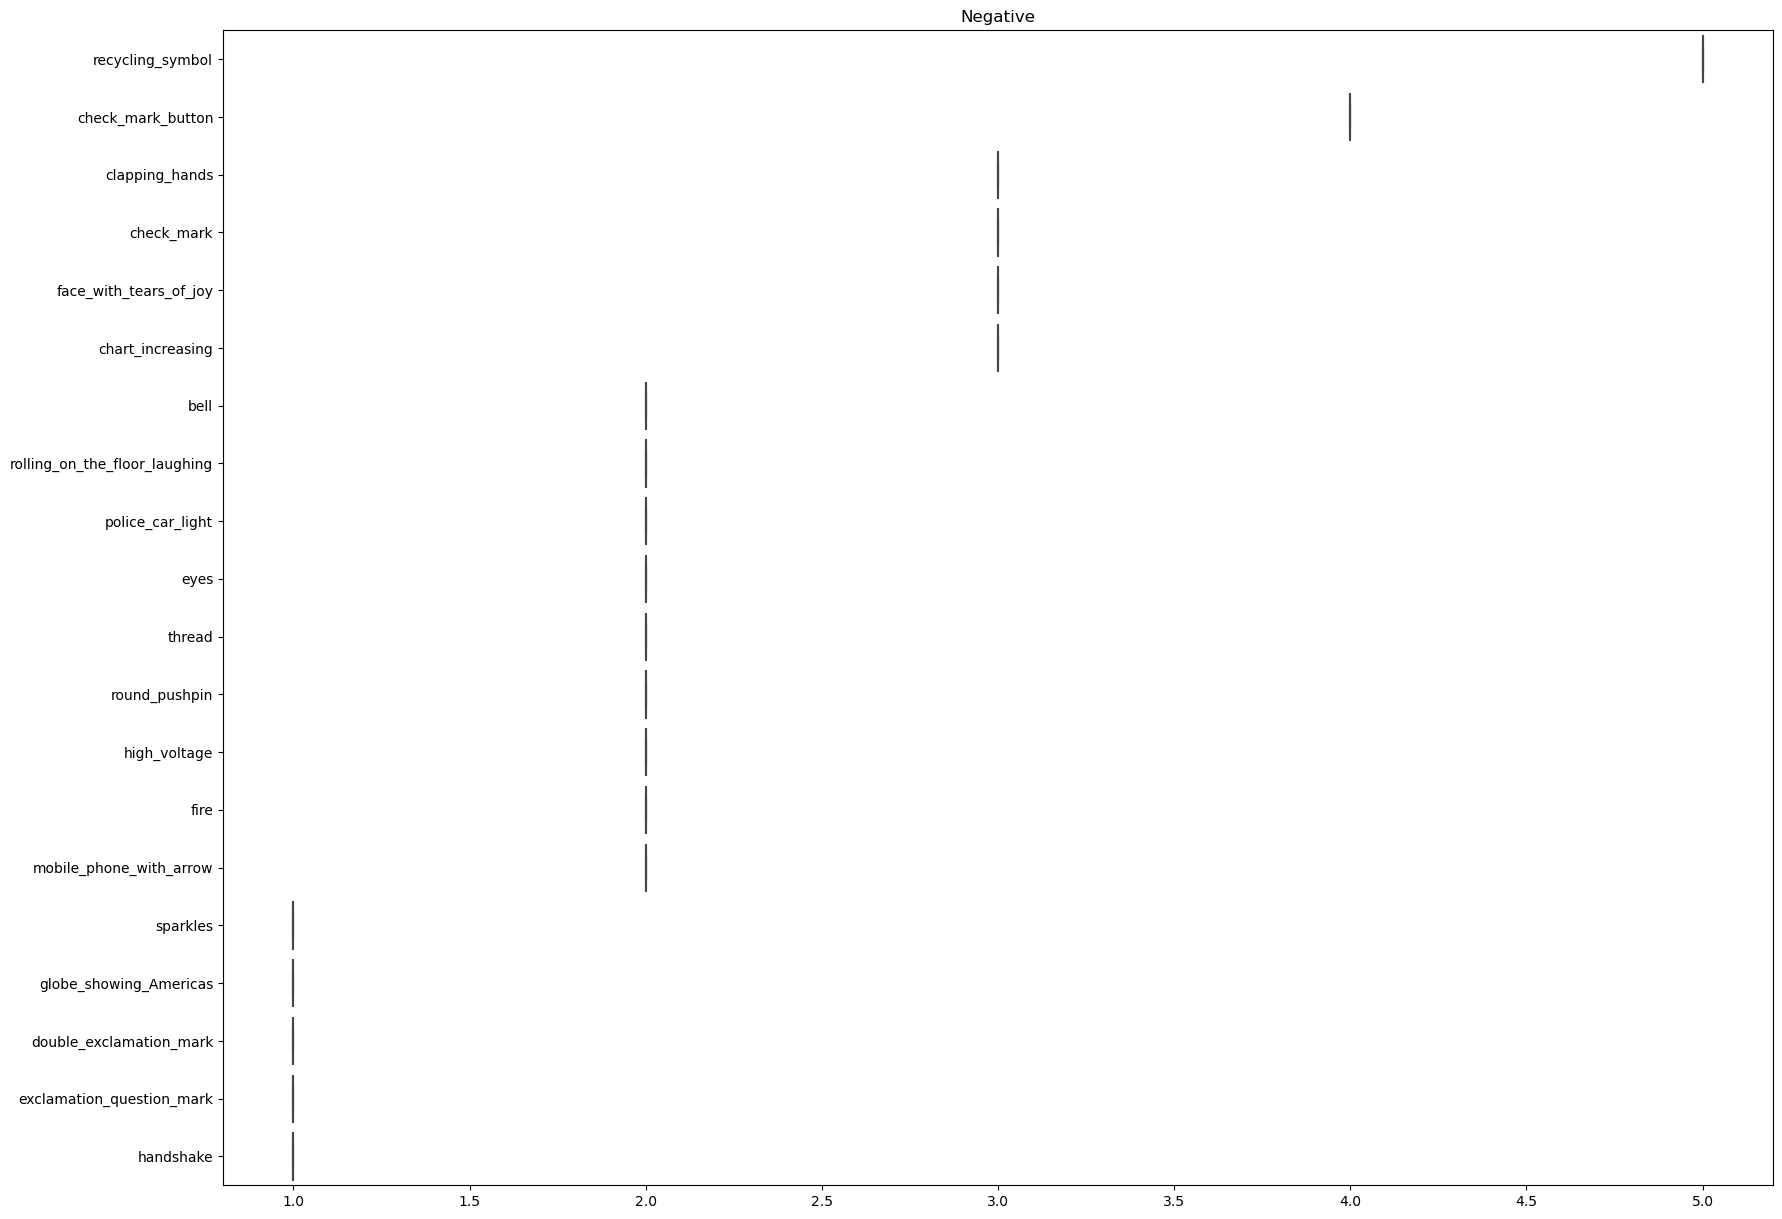

In [47]:
for t, emojis in target_emojis.items():
    plt.figure(figsize=(20, 15))
    bar_info = pd.Series(emojis).value_counts()[:20]
    print('=========='*10,  f'\nTop emojis for {t} \n', list(bar_info.index))
    bar_info.index = [emoji.demojize(i, delimiters=("", "")) for i in bar_info.index]
    sns.boxplot(x=bar_info.values, y=bar_info.index)
        
    plt.title(f'{t}')
    plt.show()

# Text Preprocessing

### Remove URL

In [48]:
import re
df['cleantext'] = df['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

### Remove Emoji

In [49]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [50]:
df['Tweet']=df['Tweet'].apply(lambda x:deEmojify(x))

### Lemmatizer

In [51]:
import nltk


from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet=WordNetLemmatizer()

corpus = []
for i in range(0, len(df)):
    review = re.sub('<.*?>+', '', df['cleantext'][i])
    review = re.sub('[%s]' % re.escape(string.punctuation), '', df['cleantext'][i])
    review = re.sub('[^a-zA-Z]', ' ', df['cleantext'][i])
    review = review.lower()
    review = review.split()
    
    review = [wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

### Stemming

In [52]:
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# import re
# ps = PorterStemmer()
# corpus = []
# for i in range(0, len(df)):
#     review = re.sub('[^a-zA-Z]', ' ', df['Tweet'][i])
#     review = review.lower()
#     review = review.split()
    
#     review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
#     review = ' '.join(review)
#     corpus.append(review)

In [53]:
df['cleantext'] = corpus
df.head()

index             User                                              Tweet  \
0      0  GoodwayMachines  Goodway is growing! Thrilled to announce our n...   
1     13         TrionixM  Stay updated with the latest technology and fe...   
2     15    digitrendsinc  Witness the live demonstrations of our Digital...   
3     23         mohapuae  Highlights from our first day participation at...   
4     38   ibmag_magazine  Al-Futtaim Group partners with SAP to bolster ...   

   Polarity Tweet_Sentiment Label  length  Num_word_text  \
0  0.309091        Positive     1      38             38   
1  0.625000        Positive     1      34             34   
2  0.212121        Positive     1      39             39   
3  0.250000        Positive     1      40             40   
4  0.400000        Positive     1      34             34   

                                           cleantext  
0  goodway growing thrilled announce new office d...  
1  stay updated latest technology feature trionix...  
2  witness live demonstration digital health tech...  
3  highlight first day participation unified nati...  
4  al futtaim group partner sap bolster digital t...

In [54]:
df['Tweet'][0]

'Goodway is growing! Thrilled to announce our new office in Dubai, UAE.  We are now bringing our award-winning cleaning and sanitation solutions to food and beverage production markets in the Middle East. Read more: https://t.co/Ug7Y6oCTQV\n\n#globalexpansion #foodprocessing https://t.co/FObJYB23q0'

In [55]:
corpus[0]

'goodway growing thrilled announce new office dubai uae bringing award winning cleaning sanitation solution food beverage production market middle east read'

In [56]:
len(corpus)

2621

In [57]:
text = ''

for item in corpus:
    text += item

## Most Common Words in Tweets

In [58]:
df['temp_list'] = df['cleantext'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [59]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Tweet', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

## WordCloud

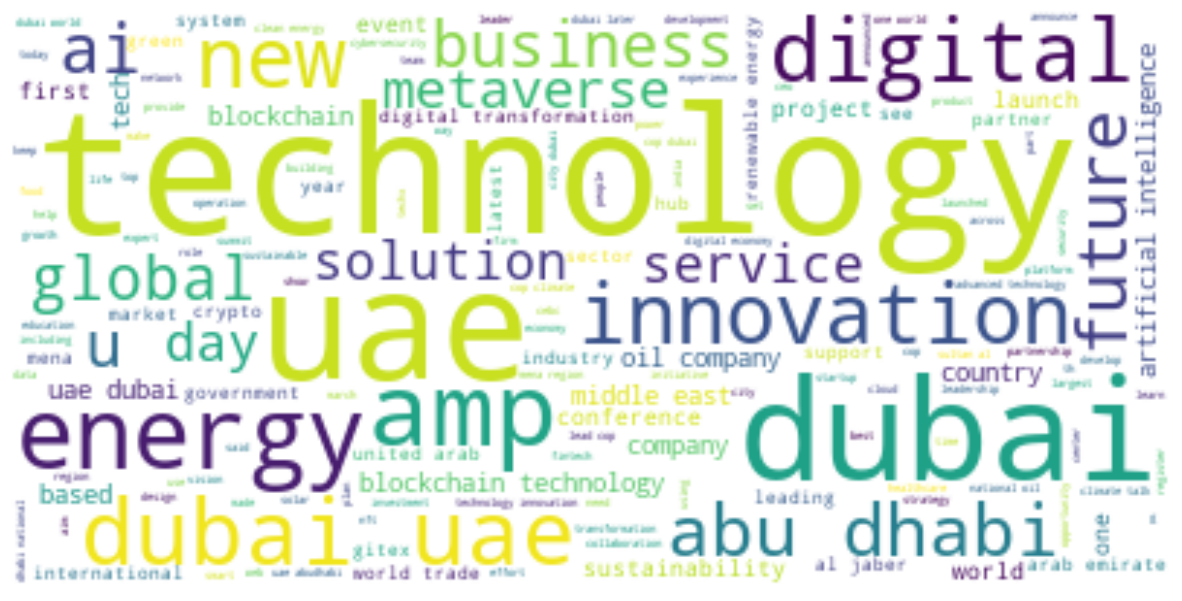

In [60]:
from wordcloud import WordCloud
plt.figure(figsize=(15,13))
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [61]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Part D - Text Analytics Pipeline

1. Create a pipeline with the following steps: CountVectorizer(), TfidfTransformer(), MultinomialNB()
2. Redo the train test split on the twitter dataset.
3. Fit the pipeline to the training data.
4. Use the pipeline to predict from the X_test and create a classification report and confusion matrix.

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline

### Multinomial NB

In [63]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [64]:
X = df['cleantext']
y = df['Label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=101)

In [65]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [66]:
pred = pipeline.predict(X_test)

Confusion matrix, without normalization


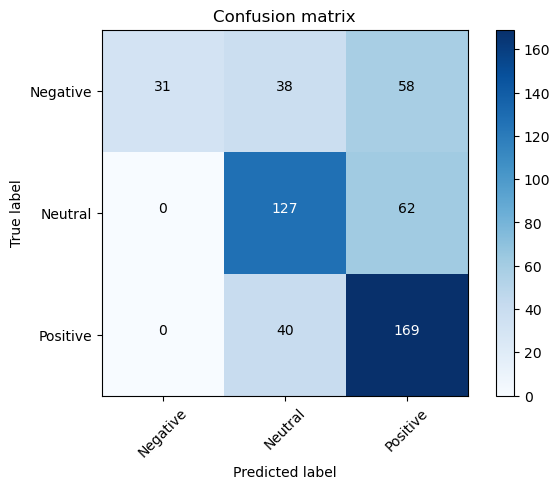

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Negative', 'Neutral','Positive'])

In [68]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = pipeline, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 60.83 %
Standard Deviation: 2.86 %


## BOW Model

In [69]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X_BOW = cv.fit_transform(corpus).toarray()

## TFIDF Model

In [70]:
# TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X_TFIDF = tfidf_v.fit_transform(corpus).toarray()

In [71]:
y = df['Label']

### Train Test Split

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_BOW, y, test_size=0.2, random_state=0)

# Creating and Evaluating Models

## Logistic Regression Model

In [73]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

In [74]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logistic_regression, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 71.52 %
Standard Deviation: 2.32 %


In [75]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('\n clasification report:\n \n', classification_report(y_test,pred))


 clasification report:
 
               precision    recall  f1-score   support

          -1       0.19      0.05      0.07       133
           0       0.39      0.39      0.39       205
           1       0.34      0.53      0.42       187

    accuracy                           0.35       525
   macro avg       0.31      0.32      0.29       525
weighted avg       0.32      0.35      0.32       525



In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')

# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='macro')

# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7104761904761905
Precision: 0.7142465022899804
Recall: 0.697740503600203
F1 Score: 0.7031207667318938


Confusion matrix, without normalization


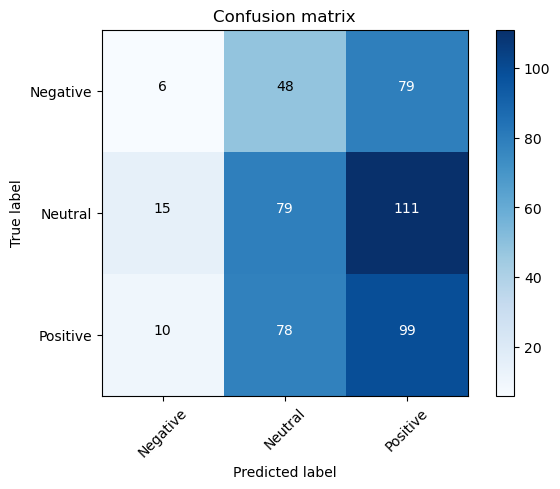

In [77]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Negative', 'Neutral','Positive'])

In [78]:
Model = ["Logistic", "Gaussian", "Multinomial", "Bernoullis"]
Accuracy = []
Precision = []

In [79]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,precision_score
from sklearn import metrics

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

### Linear SVC Model

In [80]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
y_pred = SVCmodel.predict(X_test)

/Users/ad/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [81]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = SVCmodel, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/Users/ad/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ad/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ad/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ad/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ad/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ad/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Accuracy: 70.28 %
Standard Deviation: 2.47 %


/Users/ad/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')

# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='macro')

# Print results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.6948246494818958
Recall: 0.688431918455327
F1 Score: 0.6910222821540838


Confusion matrix, without normalization


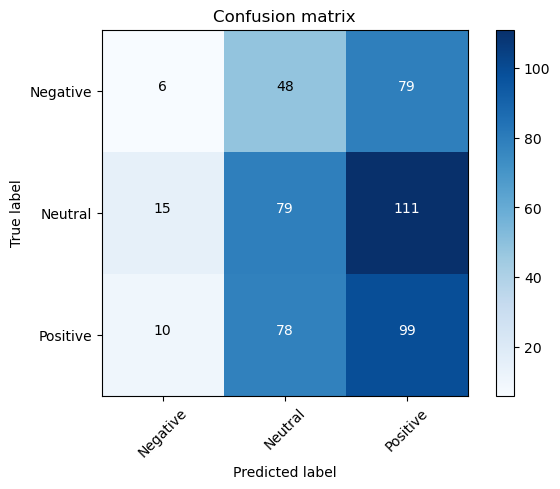

In [83]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Negative', 'Neutral','Positive'])

## Naive Bayes Models
    1. Gaussian NB
    2. Bernoulli NB

### Gaussian NB

In [84]:
# Gaussian

gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
score = metrics.accuracy_score(y_test, pred)

Accuracy:   0.562
Confusion matrix, without normalization


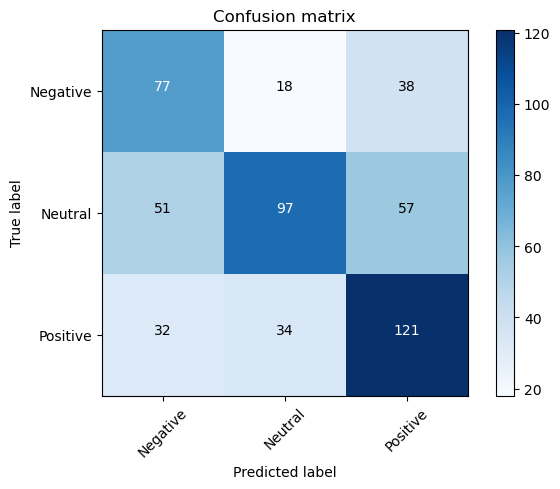

In [85]:
print("Accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Negative', 'Neutral','Positive'])

In [86]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = gnb, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 56.87 %
Standard Deviation: 3.18 %


In [87]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('\n clasification report:\n \n', classification_report(y_test,pred))


 clasification report:
 
               precision    recall  f1-score   support

          -1       0.48      0.58      0.53       133
           0       0.65      0.47      0.55       205
           1       0.56      0.65      0.60       187

    accuracy                           0.56       525
   macro avg       0.56      0.57      0.56       525
weighted avg       0.58      0.56      0.56       525



### Bernoulli NB

In [88]:
# Bernoulli

bnb.fit(X_train, y_train)
pred = bnb.predict(X_test)
score = metrics.accuracy_score(y_test, pred)

Confusion matrix, without normalization


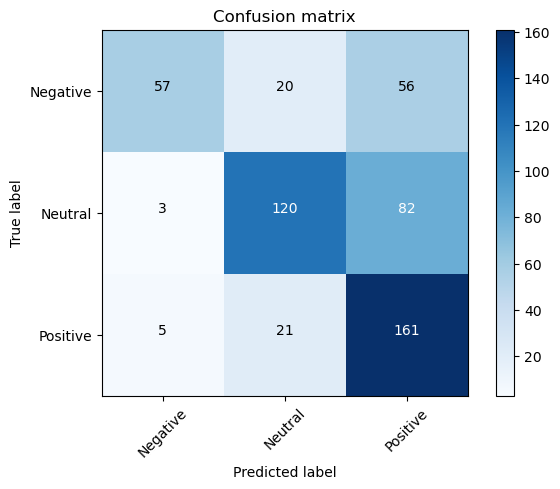

In [89]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Negative', 'Neutral','Positive'])

In [90]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = bnb, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 61.83 %
Standard Deviation: 2.42 %


In [91]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('\n clasification report:\n \n', classification_report(y_test,pred))


 clasification report:
 
               precision    recall  f1-score   support

          -1       0.88      0.43      0.58       133
           0       0.75      0.59      0.66       205
           1       0.54      0.86      0.66       187

    accuracy                           0.64       525
   macro avg       0.72      0.62      0.63       525
weighted avg       0.70      0.64      0.64       525



# Part E - Discussions and Conclusions

- BOW model for word to vector transformation yields higher performance in comparison to TFIDF model.
- Out of the 5 Machine Learning models compared for sentiment analysis, Logistic Regression model achieved the highest performance metrics. The list below highlights the performance of all models sorted in descending order of their accuracies: 

1. Logistic Regression - 71.52%
2. Linear SVC - 70.28%
3. Bernoulli NB - 61.8%
4. Multinomial NB - 60.8%
5. Gaussian NB - 56.88%